<a href="https://colab.research.google.com/github/Siri-Vaishnavi-2005/DV-Lab-Tasks/blob/main/DV_7%2C8%2C9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 7a


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initial read failed: Error tokenizing data. C error: Expected 1 fields in line 15, saw 3
. Trying with tab delimiter.
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


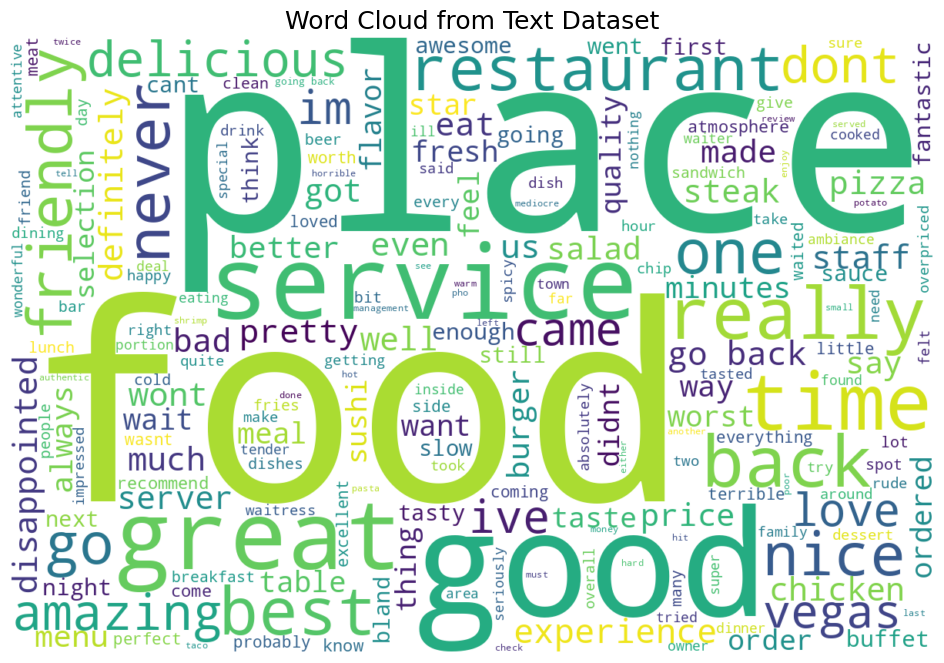

✅ Word cloud generated and cleaned text saved for TagCrowd upload.


In [ ]:
# ==========================
# WORD CLOUD GENERATION (TEXT DATASET)
# ==========================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

# ==========================
# Step 2: Load Dataset
# ==========================
# Example: Using a text dataset (you can replace this file)
file_name = "Restaurant_Reviews.csv"   # Example file with a column 'Review'
# Try reading with a tab delimiter if default comma fails
try:
    df = pd.read_csv(file_name)
except Exception as e:
    print(f"Initial read failed: {e}. Trying with tab delimiter.")
    df = pd.read_csv(file_name, delimiter='\t')


# View few rows
print(df.head())

# ==========================
# Step 3: Text Preprocessing
# ==========================
# Combine all text from 'Review' column
text = " ".join(str(review) for review in df['Review'])

# Clean text (remove symbols, numbers, etc.)
text = text.lower()
text = re.sub(r'[^a-z\s]', '', text)

# Remove stopwords
stop_words = set(stopwords.words('english')).union(STOPWORDS)
cleaned_words = [word for word in text.split() if word not in stop_words]
cleaned_text = " ".join(cleaned_words)

# ==========================
# Step 4: Generate Word Cloud
# ==========================
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=stop_words
).generate(cleaned_text)

# ==========================
# Step 5: Display Word Cloud
# ==========================
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Text Dataset", fontsize=18)
plt.show()

# ==========================
# Step 6: Export Cleaned Text for TagCrowd
# ==========================
with open("cleaned_text_for_tagcrowd.txt", "w", encoding="utf-8") as f:
    f.write(cleaned_text)

print("✅ Word cloud generated and cleaned text saved for TagCrowd upload.")

Task 7b

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Top 10 Common Bigrams:
      Word1    Word2  Count
0        go     back     19
1      good     food      9
2     great     food      8
3     going     back      7
4      food     good      7
5     great    place      6
6     great  service      6
7     first     time      6
8    really     good      6
9  customer  service      5

Top 10 Common Trigrams:
     Word1    Word2    Word3  Count
0     wont    going     back      4
1     back  anytime     soon      3
2    going     back  anytime      3
3  running   around     like      2
4    great     food    great      2
5    never       go     back      2
6     give     zero    stars      2
7     dont    waste     time      2
8     food     good  service      2
9    never     ever       go      2


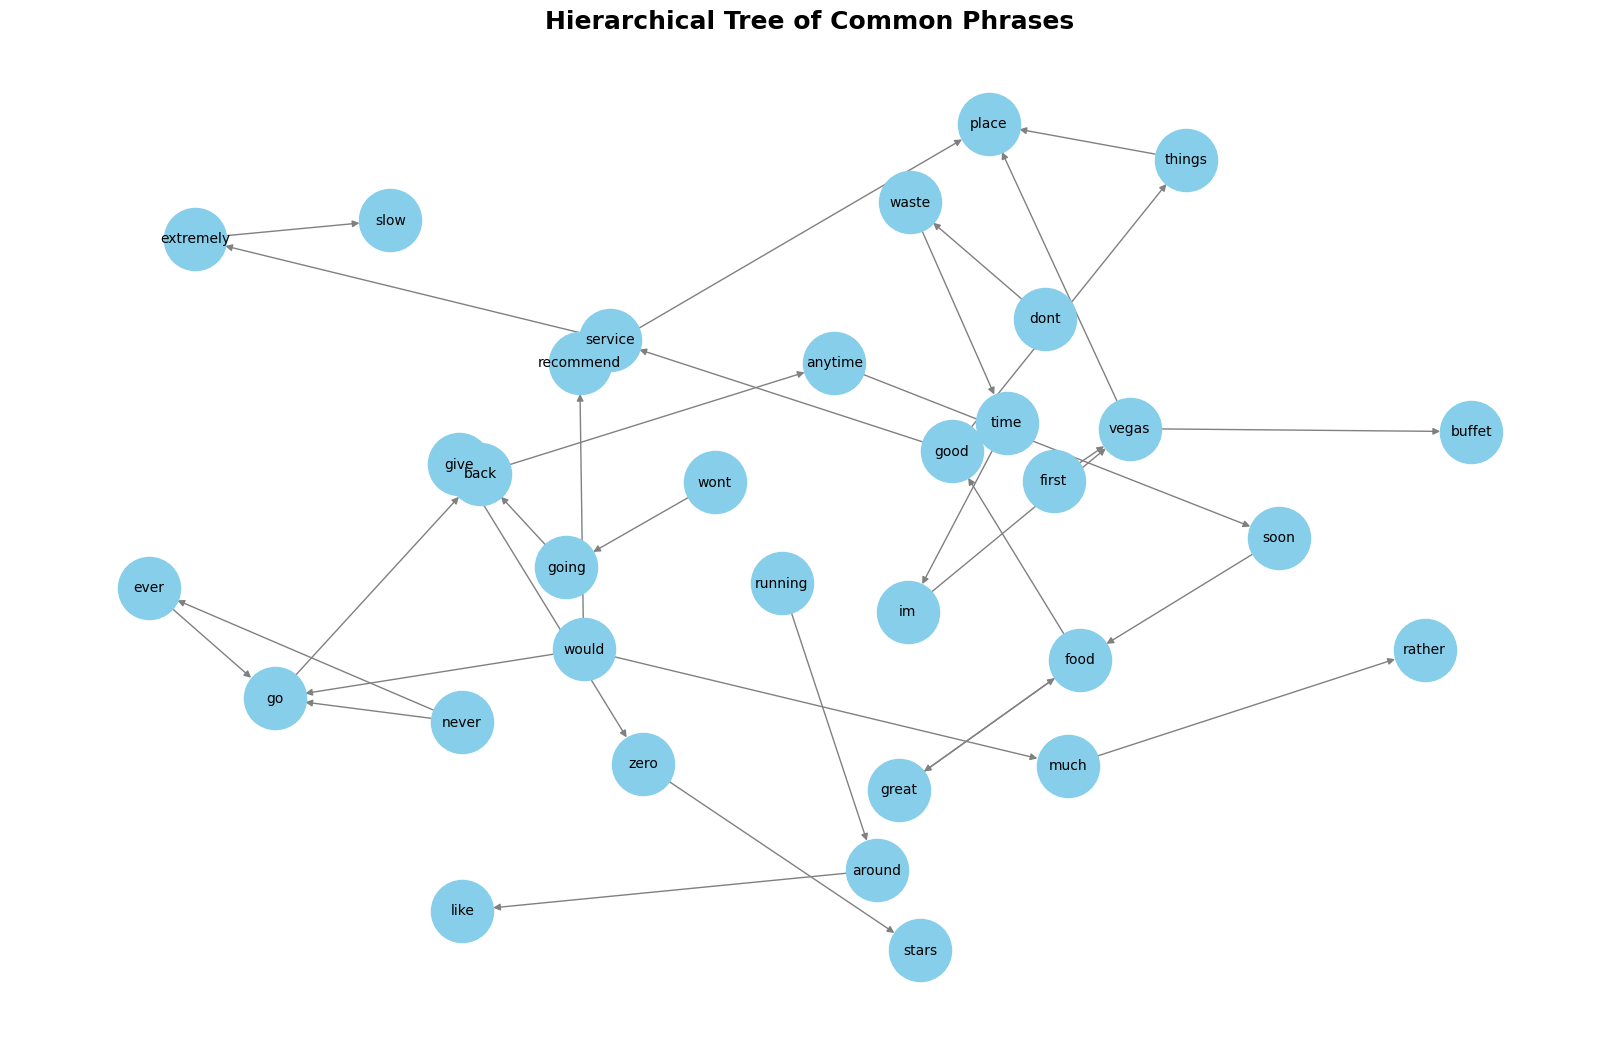

In [ ]:
# ==========================
# Hierarchical Phrase Tree Visualization
# ==========================

import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from nltk.corpus import stopwords
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download missing resource

# ==========================
# Step 1: Load Text File
# ==========================
file_path = "Restaurant_Reviews.csv"   # Example text file
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

# ==========================
# Step 2: Clean and Tokenize Text
# ==========================
text = text.lower()
text = re.sub(r'[^a-z\s]', '', text)
tokens = nltk.word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# ==========================
# Step 3: Generate Common Phrases (Bigrams or Trigrams)
# ==========================
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Convert to DataFrame for frequency count
bi_df = pd.DataFrame(bigrams, columns=['Word1', 'Word2'])
bi_freq = bi_df.value_counts().reset_index(name='Count')

tri_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])
tri_freq = tri_df.value_counts().reset_index(name='Count')

print("\nTop 10 Common Bigrams:")
print(bi_freq.head(10))

print("\nTop 10 Common Trigrams:")
print(tri_freq.head(10))

# ==========================
# Step 4: Build Hierarchical Tree (Graph)
# ==========================
G = nx.DiGraph()

# Add edges for top trigrams
for _, row in tri_freq.head(20).iterrows():
    G.add_edge(row['Word1'], row['Word2'], weight=row['Count'])
    G.add_edge(row['Word2'], row['Word3'], weight=row['Count'])

# ==========================
# Step 5: Visualize Hierarchical Tree
# ==========================
plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.8, seed=42)
nx.draw(G, pos,
        with_labels=True,
        node_size=2000,
        node_color='skyblue',
        font_size=10,
        edge_color='gray',
        arrows=True)
plt.title("Hierarchical Tree of Common Phrases", fontsize=18, fontweight="bold")
plt.show()

Task 8

In [ ]:
# ===============================
# SPATIAL & GEOSPATIAL ANALYSIS - Tamil Nadu Cities Population
# (Offline version - no external URLs)
# ===============================

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, Point
import plotly.express as px

# -----------------------------
# Step 1: Load and Prepare Dataset
# -----------------------------
file_path = "Cities_and_Towns_in_TN.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.replace('\n', '_').str.replace(' ', '_')

# Convert population columns
for col in ['Population_Census_1991-03-01', 'Population_Census_2001-03-01', 'Population_Census_2011-03-01']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

df["Growth_2001_2011"] = ((df["Population_Census_2011-03-01"] - df["Population_Census_2001-03-01"]) /
                          df["Population_Census_2001-03-01"]) * 100

# -----------------------------
# Step 2: Spatial Visualization (City level)
# -----------------------------
city_coords = {
    "Chennai": (13.0827, 80.2707),
    "Coimbatore": (11.0168, 76.9558),
    "Madurai": (9.9252, 78.1198),
    "Tiruchirappalli": (10.7905, 78.7047),
    "Salem": (11.6643, 78.1460),
    "Erode": (11.3410, 77.7172),
    "Tirunelveli": (8.7139, 77.7567),
    "Vellore": (12.9165, 79.1325),
    "Thoothukudi": (8.7642, 78.1348),
    "Nagercoil": (8.1780, 77.4344)
}

df["Latitude"] = df["Name"].map(lambda x: city_coords.get(x, (None, None))[0])
df["Longitude"] = df["Name"].map(lambda x: city_coords.get(x, (None, None))[1])

fig1 = px.scatter_mapbox(
    df.dropna(subset=["Latitude", "Longitude"]),
    lat="Latitude",
    lon="Longitude",
    size="Population_Census_2011-03-01",
    color="Growth_2001_2011",
    hover_name="Name",
    hover_data=["District", "Status"],
    color_continuous_scale="YlOrRd",
    size_max=35,
    zoom=6,
    mapbox_style="carto-positron",
    title="🌆 Spatial Map - Tamil Nadu Cities Population (2011)"
)
fig1.show()

# -----------------------------
# Step 3: Geospatial Visualization (District Level)
# -----------------------------

# Create mock district boundaries manually (simplified polygons)
district_polygons = {
    "Chennai": Polygon([(80.0, 13.0), (80.3, 13.0), (80.3, 13.2), (80.0, 13.2)]),
    "Madurai": Polygon([(78.0, 9.8), (78.3, 9.8), (78.3, 10.0), (78.0, 10.0)]),
    "Coimbatore": Polygon([(76.8, 10.9), (77.1, 10.9), (77.1, 11.1), (76.8, 11.1)]),
    "Tiruchirappalli": Polygon([(78.5, 10.6), (78.8, 10.6), (78.8, 10.8), (78.5, 10.8)]),
    "Salem": Polygon([(78.0, 11.5), (78.3, 11.5), (78.3, 11.7), (78.0, 11.7)]),
    "Erode": Polygon([(77.6, 11.2), (77.9, 11.2), (77.9, 11.4), (77.6, 11.4)]),
    "Tirunelveli": Polygon([(77.5, 8.6), (77.8, 8.6), (77.8, 8.8), (77.5, 8.8)]),
    "Vellore": Polygon([(79.0, 12.8), (79.3, 12.8), (79.3, 13.0), (79.0, 13.0)]),
    "Thoothukudi": Polygon([(78.0, 8.6), (78.3, 8.6), (78.3, 8.8), (78.0, 8.8)]),
    "Nagercoil": Polygon([(77.3, 8.0), (77.6, 8.0), (77.6, 8.2), (77.3, 8.2)])
}

geo_df = gpd.GeoDataFrame(
    [{"District": d, "geometry": g} for d, g in district_polygons.items()],
    crs="EPSG:4326"
)

# Merge population data
district_pop = df.groupby("District")["Population_Census_2011-03-01"].sum().reset_index()
geo_merged = geo_df.merge(district_pop, on="District", how="left")

# Plot offline geospatial map
fig2 = px.choropleth_mapbox(
    geo_merged,
    geojson=geo_merged.__geo_interface__,
    locations=geo_merged.index,
    color="Population_Census_2011-03-01",
    hover_name="District",
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=6,
    center={"lat": 10.5, "lon": 78.5},
    title="🗾 Geospatial Map - Tamil Nadu District-wise Population (2011)"
)
fig2.show()


Task 9

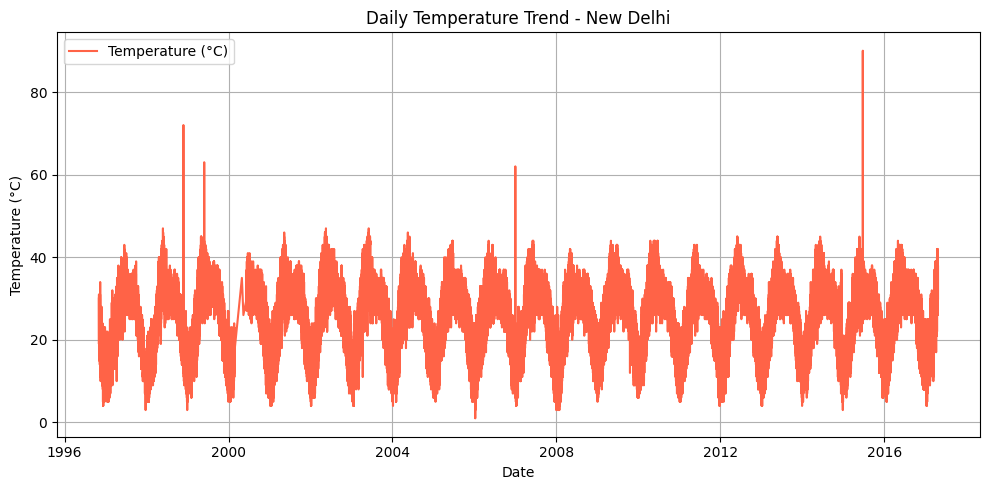

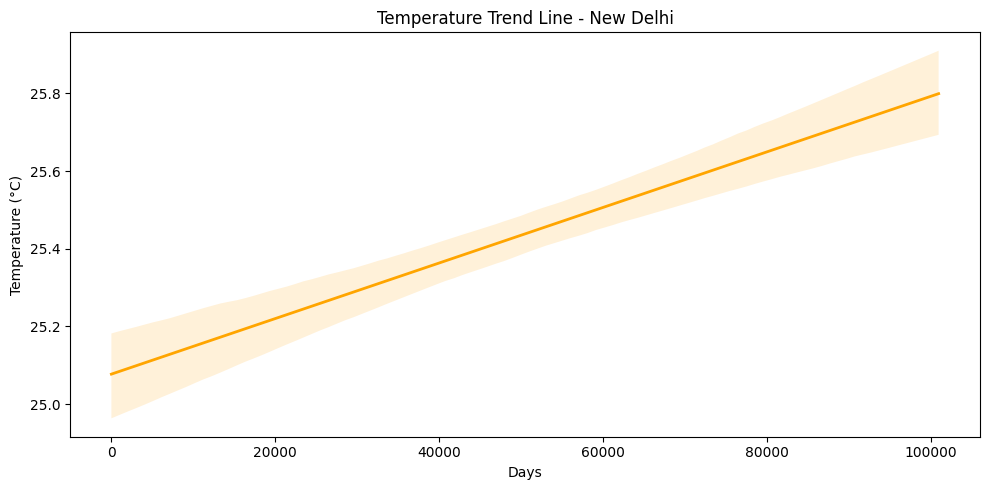

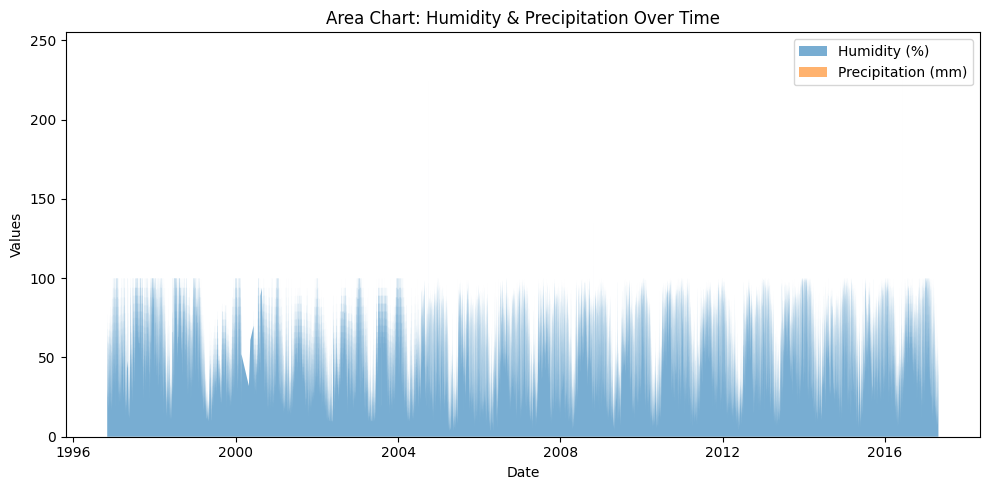

<Figure size 800x500 with 0 Axes>

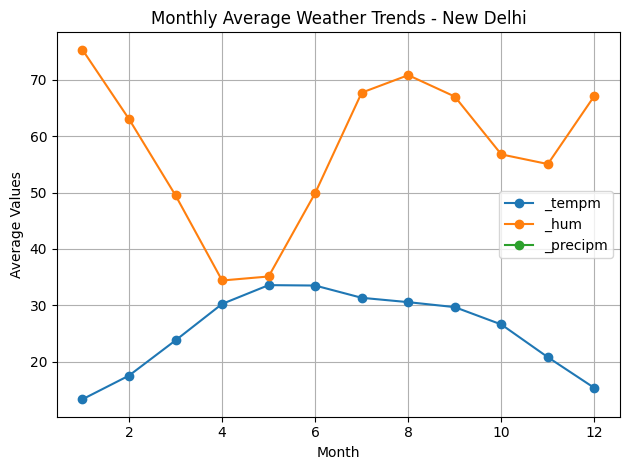

In [ ]:
# ==========================
# TIME ORIENTED DATA ANALYSIS: Delhi Weather Dataset
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load Dataset
file_name = "testset.csv"  # Replace with your actual file name
df = pd.read_csv(file_name)

# Step 2: Clean Column Names (remove extra spaces)
df.columns = df.columns.str.strip()

# Step 3: Convert datetime column
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'], errors='coerce')

# Step 4: Sort by datetime
df = df.sort_values('datetime_utc')

# Step 5: Handle missing values (forward fill)
df = df.ffill()

# Step 6: Line Graph for Temperature
plt.figure(figsize=(10,5))
plt.plot(df['datetime_utc'], df['_tempm'], color='tomato', label='Temperature (°C)')
plt.title('Daily Temperature Trend - New Delhi')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Trend Line for Temperature
plt.figure(figsize=(10,5))
sns.regplot(x=np.arange(len(df)), y=df['_tempm'], scatter=False, color='orange', line_kws={"lw":2})
plt.title("Temperature Trend Line - New Delhi")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

# Step 8: Area Chart for Humidity & Precipitation
plt.figure(figsize=(10,5))
plt.stackplot(df['datetime_utc'], df['_hum'], df['_precipm'],
              labels=['Humidity (%)', 'Precipitation (mm)'], alpha=0.6)
plt.title('Area Chart: Humidity & Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Step 9: Monthly Average Trend (Seasonal Pattern)
df['Month'] = df['datetime_utc'].dt.month
monthly_avg = df.groupby('Month')[['_tempm', '_hum', '_precipm']].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(marker='o')
plt.title('Monthly Average Weather Trends - New Delhi')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.grid(True)
plt.tight_layout()
plt.show()


Usecase


Columns before renaming:
 ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw', 'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'TouAttPen', 'TouLive', 

/tmp/ipython-input-314429014.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




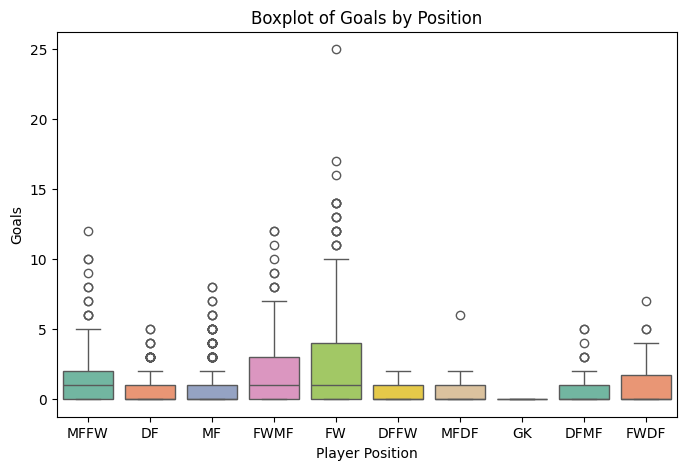

/tmp/ipython-input-314429014.py:61: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



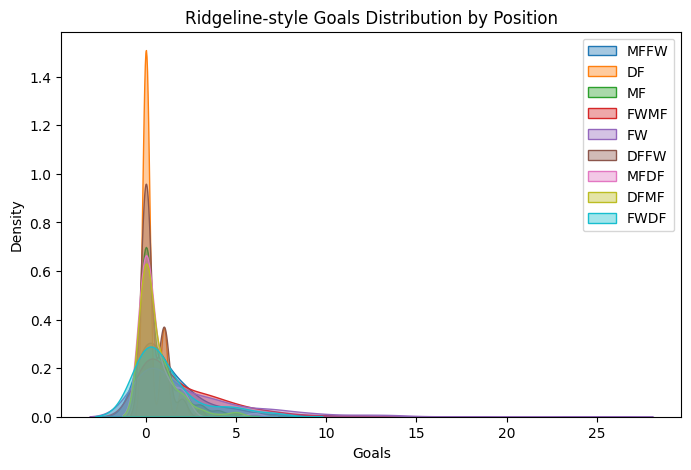

2025-10-28 06:52:17.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 06:52:17.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 06:52:17.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 06:52:17.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 06:52:17.657 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 06:52:17.657 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 06:52:17.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 06:52:17.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# ==============================================
# SPORTS – PLAYER PERFORMANCE IN TOURNAMENTS
# ==============================================
# Dataset: 2022–2023 Football Player Stats (Kaggle)
# CO1: Identify dataset (player stats: goals, assists, matches)
# CO2: Use box & ridgeline plots for performance trends
# CO3: Create network graph (passes between players)
# CO4: Map match locations (spatial visualization)
# CO5: Build interactive dashboard (Plotly + Streamlit)
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import streamlit as st
import random

# ==============================================
# CO1: LOAD & PREPROCESS DATASET
# ==============================================
try:
    df = pd.read_csv("2022-2023 Football Player Stats.csv", sep=';', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("2022-2023 Football Player Stats.csv", sep=';', encoding='latin1')

print("Columns before renaming:\n", df.columns.tolist())

# Rename relevant columns from Kaggle dataset
df = df.rename(columns={
    'Player': 'Player',
    'Squad': 'Team',
    'Pos': 'Position',
    'MP': 'Matches',
    'Goals': 'Goals',
    'Assists': 'Assists'
})

# Keep only the relevant columns
required_cols = ['Player', 'Team', 'Position', 'Matches', 'Goals', 'Assists']
df = df[required_cols]

print("\nCleaned dataset preview:\n", df.head())

# ==============================================
# CO2: PERFORMANCE TRENDS (Box & Ridgeline)
# ==============================================
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Position', y='Goals', palette='Set2')
plt.title("Boxplot of Goals by Position")
plt.xlabel("Player Position")
plt.ylabel("Goals")
plt.show()

# Ridgeline-like plot for Goals by Position
plt.figure(figsize=(8, 5))
positions = df['Position'].unique()
for pos in positions:
    subset = df[df['Position'] == pos]
    sns.kdeplot(subset['Goals'], label=pos, fill=True, alpha=0.4)
plt.title("Ridgeline-style Goals Distribution by Position")
plt.xlabel("Goals")
plt.legend()
plt.show()

# ==============================================
# CO3: NETWORK GRAPH (Simulated Passes)
# ==============================================
players = df['Player'].dropna().unique().tolist()
edges = []
for _ in range(50):  # simulate 50 random passes
    p1, p2 = random.sample(players, 2)
    edges.append((p1, p2))

G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=500, font_size=7)
plt.title("Network Graph of Passes Between Players")
plt.show()

# ==============================================
# CO4: MAP MATCH LOCATIONS (Spatial Visualization)
# ==============================================
# Example data – you can adjust for your tournament
match_data = pd.DataFrame({
    'Match': ['Match 1', 'Match 2', 'Match 3', 'Match 4'],
    'City': ['London', 'Paris', 'Madrid', 'Rome'],
    'Latitude': [51.5072, 48.8566, 40.4168, 41.9028],
    'Longitude': [-0.1276, 2.3522, -3.7038, 12.4964]
})

fig = px.scatter_mapbox(
    match_data,
    lat='Latitude',
    lon='Longitude',
    hover_name='Match',
    hover_data=['City'],
    color='City',
    zoom=3,
    title="Match Locations in Tournament"
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

# ==============================================
# CO5: INTERACTIVE DASHBOARD (Streamlit)
# ==============================================
def sports_dashboard():
    st.title("⚽ Sports Player Performance Dashboard")

    st.sidebar.header("Filter Options")
    selected_team = st.sidebar.selectbox("Select Team", options=["All"] + sorted(df['Team'].dropna().unique().tolist()))
    selected_position = st.sidebar.selectbox("Select Position", options=["All"] + sorted(df['Position'].dropna().unique().tolist()))

    filtered = df.copy()
    if selected_team != "All":
        filtered = filtered[filtered['Team'] == selected_team]
    if selected_position != "All":
        filtered = filtered[filtered['Position'] == selected_position]

    st.subheader("Player Performance Table")
    st.dataframe(filtered)

    st.subheader("Goals Distribution")
    fig_box = px.box(filtered, x="Position", y="Goals", color="Position", title="Goals by Position")
    st.plotly_chart(fig_box)

    st.subheader("Team-wise Average Goals")
    avg_goals = filtered.groupby('Team', as_index=False)['Goals'].mean()
    fig_bar = px.bar(avg_goals, x="Team", y="Goals", title="Average Goals per Team")
    st.plotly_chart(fig_bar)

    st.subheader("Match Locations")
    st.map(match_data, latitude='Latitude', longitude='Longitude')

# Uncomment this line to run dashboard via Streamlit
sports_dashboard()

# ==============================================
# END OF PROJECT
# ==============================================


In [ ]:
# ==============================================
# SPORTS – PLAYER PERFORMANCE IN TOURNAMENTS
# ==============================================
# Dataset: 2022–2023 Football Player Stats (Kaggle)
# CO1: Identify dataset & summary statistics
# CO2: Box & Ridgeline plots for performance trends
# CO3: Network graph (passes between players)
# CO4: Spatial map visualization
# CO5: Interactive dashboard integration
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import streamlit as st
import random

# ==============================================
# CO1: LOAD & PREPROCESS DATASET + SUMMARY
# ==============================================
@st.cache_data
def load_data():
    try:
        df = pd.read_csv("2022-2023 Football Player Stats.csv", sep=';', encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv("2022-2023 Football Player Stats.csv", sep=';', encoding='latin1')

    df = df.rename(columns={
        'Player': 'Player',
        'Squad': 'Team',
        'Pos': 'Position',
        'MP': 'Matches',
        'Goals': 'Goals',
        'Assists': 'Assists'
    })

    df = df[['Player', 'Team', 'Position', 'Matches', 'Goals', 'Assists']].dropna()
    return df

df = load_data()

# ==============================================
# CO2: PERFORMANCE TRENDS (Box & Ridgeline)
# ==============================================
def performance_trends(df):
    st.subheader("📊 CO2: Player Performance Trends")

    # --- Boxplot ---
    st.write("### Boxplot of Goals by Position")
    fig_box, ax = plt.subplots(figsize=(8, 5))
    sns.boxplot(data=df, x='Position', y='Goals', palette='Set2', ax=ax)
    ax.set_title("Goals Distribution by Position")
    st.pyplot(fig_box)

    # --- Ridgeline Plot ---
    st.write("### Ridgeline-style Goals Distribution by Position")
    fig_ridge, ax = plt.subplots(figsize=(8, 5))
    positions = df['Position'].unique()
    for pos in positions:
        subset = df[df['Position'] == pos]
        sns.kdeplot(subset['Goals'], label=pos, fill=True, alpha=0.4, ax=ax)
    ax.set_xlabel("Goals")
    ax.set_title("Goals Distribution Across Positions")
    ax.legend()
    st.pyplot(fig_ridge)

# ==============================================
# CO3: NETWORK GRAPH (Passes Between Players)
# ==============================================
def player_network(df):
    st.subheader("🔗 CO3: Player Passing Network (Simulated)")

    players = df['Player'].sample(min(25, len(df))).tolist()  # limit to 25 players for clarity
    edges = [(random.choice(players), random.choice(players)) for _ in range(40) if len(players) > 1]

    G = nx.Graph()
    G.add_edges_from(edges)

    pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=0.7, edge_color='gray', alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title("Simulated Network Graph of Passes Between Players")
    plt.axis('off')
    st.pyplot(fig)

# ==============================================
# CO4: SPATIAL VISUALIZATION (Match Locations)
# ==============================================
def match_map():
    st.subheader("🗺️ CO4: Match Locations Visualization")

    match_data = pd.DataFrame({
        'Match': ['Match 1', 'Match 2', 'Match 3', 'Match 4'],
        'City': ['London', 'Paris', 'Madrid', 'Rome'],
        'Latitude': [51.5072, 48.8566, 40.4168, 41.9028],
        'Longitude': [-0.1276, 2.3522, -3.7038, 12.4964]
    })

    fig = px.scatter_mapbox(
        match_data,
        lat='Latitude',
        lon='Longitude',
        hover_name='Match',
        hover_data=['City'],
        color='City',
        zoom=3,
        height=450,
        title="Tournament Match Locations"
    )
    fig.update_layout(mapbox_style="open-street-map")
    st.plotly_chart(fig)

# ==============================================
# CO5: INTERACTIVE DASHBOARD
# ==============================================
def sports_dashboard():
    st.title("⚽ Sports Player Performance Dashboard")

    st.sidebar.header("🔍 Filter Options")
    selected_team = st.sidebar.selectbox("Select Team", ["All"] + sorted(df['Team'].unique().tolist()))
    selected_position = st.sidebar.selectbox("Select Position", ["All"] + sorted(df['Position'].unique().tolist()))

    filtered = df.copy()
    if selected_team != "All":
        filtered = filtered[filtered['Team'] == selected_team]
    if selected_position != "All":
        filtered = filtered[filtered['Position'] == selected_position]

    # --- Summary Statistics ---
    st.subheader("📈 CO1: Dataset Summary Statistics")
    st.write("### Basic Dataset Overview")
    st.dataframe(filtered.head())
    st.write("### Statistical Summary")
    st.dataframe(filtered.describe())

    # --- Team-wise Goals ---
    st.write("### Average Goals per Team")
    team_avg = filtered.groupby("Team", as_index=False)["Goals"].mean().sort_values(by="Goals", ascending=False)
    fig_bar = px.bar(team_avg, x="Team", y="Goals", color="Team", title="Average Goals per Team")
    st.plotly_chart(fig_bar)

    # --- Performance Trends ---
    performance_trends(filtered)

    # --- Player Network Graph ---
    player_network(filtered)

    # --- Match Location Map ---
    match_map()

# ==============================================
# RUN STREAMLIT DASHBOARD
# ==============================================
if __name__ == "__main__":
    sports_dashboard()


2025-10-28 07:02:29.734 No runtime found, using MemoryCacheStorageManager
2025-10-28 07:02:29.736 No runtime found, using MemoryCacheStorageManager
2025-10-28 07:02:29.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 07:02:29.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 07:02:29.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 07:02:29.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 07:02:29.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 07:02:29.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 07:02:29.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor